In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

In [3]:
housing_data = pd.read_csv("/content/sample_data/california_housing_test.csv")

In [4]:
housing_data.shape

(3000, 9)

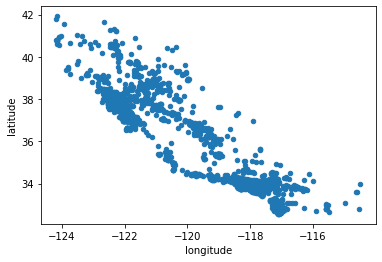

In [5]:
housing_data.plot(kind="scatter",x="longitude",y="latitude")

# New Section

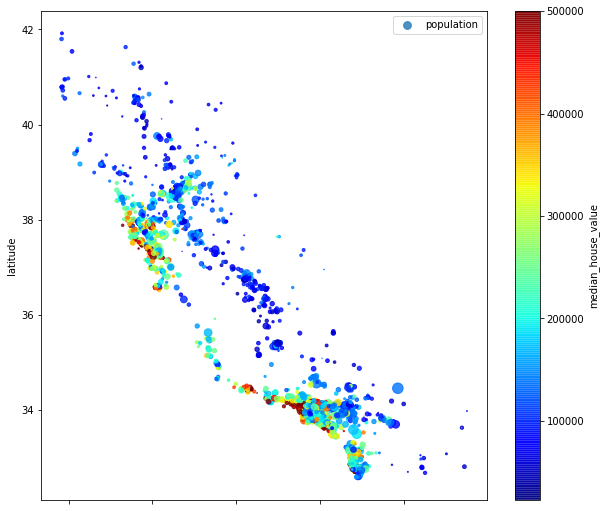

In [31]:
housing_data.plot(kind="scatter",x="longitude",y="latitude",alpha=0.8,s=housing_data["population"]/100,label="population",figsize=(10,9),
                  c='median_house_value',cmap=plt.get_cmap("jet"),colorbar=True)
plt.legend()

# New Section

In [10]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [32]:
housing_data.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
median_house_value    False
dtype: bool

In [33]:
housing_data.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [41]:
x=pd.DataFrame(columns=["longitude","latitude",	"housing_median_age",	"total_rooms",	"total_bedrooms",	"population",	"households",	"median_income"],data=housing_data)
y=pd.DataFrame(columns=["median_house_value"],data=housing_data)

In [42]:
x.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375


In [43]:
y.head()

,median_house_value
0,344700.0
1,176500.0
2,270500.0
3,330000.0
4,81700.0


In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [45]:
x.shape

(3000, 8)

In [46]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [47]:
x_train

array([[-1.24017503,  0.78214879, -0.28769061, ...,  0.57721773,
         0.48807864,  2.33489201],
       [ 0.72111075, -0.79419488, -0.36713572, ...,  1.03816697,
        -0.02098393, -0.7314095 ],
       [-1.05866786,  0.45746905, -0.76436127, ..., -0.70029778,
        -0.60159042,  1.22400793],
       ...,
       [ 1.31605091, -1.12358013, -1.32047704, ...,  1.66532852,
         1.25580003,  0.53307562],
       [-0.55448129,  1.31387069, -1.24103193, ..., -0.78147123,
        -0.71716138,  0.27543984],
       [-0.00491792,  0.43864704, -0.04935527, ..., -0.47030634,
        -0.49702622, -0.52143362]])

In [51]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(x.shape[1],activation='relu',input_dim=x.shape[1]),
    tf.keras.layers.Dense(512,kernel_initializer='normal',activation='relu'),
    tf.keras.layers.Dense(256,kernel_initializer='normal',activation='relu'),
    tf.keras.layers.Dense(128,kernel_initializer='normal',activation='relu'),
    tf.keras.layers.Dense(64,kernel_initializer='normal',activation='relu'),
    tf.keras.layers.Dense(32,kernel_initializer='normal',activation='relu'),
    tf.keras.layers.Dense(1,kernel_initializer='normal',activation='relu'),
])

In [54]:
x.shape[1]

8

In [62]:

model.compile(loss='mse',optimizer='Adam',metrics=['mse','mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 512)               4608      
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 1)                 3

In [64]:
history = model.fit(x_train,y_train.to_numpy(),batch_size=10,epochs=10,verbose=1)

Epoch 1/10
240/240 [==============================] - 1s 3ms/step - loss: 54555156480.0000 - mse: 54555156480.0000 - mae: 204809.0938
Epoch 2/10
240/240 [==============================] - 1s 3ms/step - loss: 54555164672.0000 - mse: 54555164672.0000 - mae: 204809.1719
Epoch 3/10
240/240 [==============================] - 1s 3ms/step - loss: 54555172864.0000 - mse: 54555172864.0000 - mae: 204809.1406
Epoch 4/10
240/240 [==============================] - 1s 4ms/step - loss: 54555156480.0000 - mse: 54555156480.0000 - mae: 204809.1406
Epoch 5/10
240/240 [==============================] - 1s 3ms/step - loss: 54555152384.0000 - mse: 54555152384.0000 - mae: 204809.1094
Epoch 6/10
240/240 [==============================] - 1s 3ms/step - loss: 54555136000.0000 - mse: 54555136000.0000 - mae: 204809.0625
Epoch 7/10
240/240 [==============================] - 1s 3ms/step - loss: 54555156480.0000 - mse: 54555160576.0000 - mae: 204809.0469
Epoch 8/10
240/240 [==============================] - 1s 3ms/s

In [65]:
model.predict(x_test)

19/19 [==============================] - 0s 2ms/step


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [66]:
model.evaluate(x_test)

19/19 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - mse: 0.0000e+00 - mae: 0.0000e+00


[0.0, 0.0, 0.0]

In [69]:
model.evaluate(x_test,y_test)

19/19 [==============================] - 0s 2ms/step - loss: 57601806336.0000 - mse: 57601806336.0000 - mae: 209995.0625


[57601806336.0, 57601806336.0, 209995.0625]